# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [22]:
%%time
stock_list = pd.read_csv(r"C:\Users\Jonat\Documents\GitHub\lstm-stock-price-prediction\data\ticker.csv")
stock_list = stock_list['tickers'].to_list()
stock_list

CPU times: total: 0 ns
Wall time: 2 ms


['AAPL',
 'AMZN',
 'GOOGL',
 'NVDA',
 'TSLA',
 'AVGO',
 'MSFT',
 'NFLX',
 'META',
 'MU',
 'TSM',
 'WMT',
 'V',
 'MA',
 'SMH',
 'SPY',
 'QQQ',
 'XLK',
 'XLC']

In [23]:
len(stock_list)

19

# For Loop

In [3]:
%%time
import os
import pandas as pd
import yfinance as yf
from tqdm import tqdm

# List of stock tickers to download
stock_list = ["NVDA"]  # Add your desired tickers here

# Define the directory where you want to save the files
output_dir = "..\\data\\raw\\"  # Replace with your desired directory path
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Define the date range for stock data
start_date = '2010-01-01'
end_date = '2024-12-20'

# Function to download stock data and save it to individual CSV
def download_and_save_stock_data(ticker):
    try:
        print(f"Downloading data for {ticker}...")

        # Download stock data
        stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

        # Validate that data was retrieved
        if stock_data.empty:
            raise ValueError(f"No data found for {ticker}")

        # Ensure correct column order and headers
        stock_data = stock_data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
        stock_data.index.name = "Date"  # Set the index name to "Date"

        # Save data to a CSV file dynamically named after the ticker
        file_name = f"{ticker.lower()}_stock_price.csv"
        output_path = os.path.join(output_dir, file_name)
        stock_data.to_csv(output_path, header=True)  # Save with headers

        print(f"File saved to: {output_path}")

    except Exception as e:
        error_message = f"Error downloading {ticker}: {str(e)}"
        print(error_message)

# Main function to iterate through tickers
def main():
    print("Starting sequential stock data download...")

    # Progress bar for the loop
    for ticker in tqdm(stock_list, desc="Downloading Stock Data"):
        download_and_save_stock_data(ticker)

    print("\nDownload Summary:")
    print("All stock data has been downloaded and saved successfully.")

if __name__ == "__main__":
    main()

Starting sequential stock data download...


File saved to: ..\data\raw\nvda_stock_price.csv

Download Summary:
All stock data has been downloaded and saved successfully.
CPU times: total: 125 ms
Wall time: 998 ms


Processing NVDA...


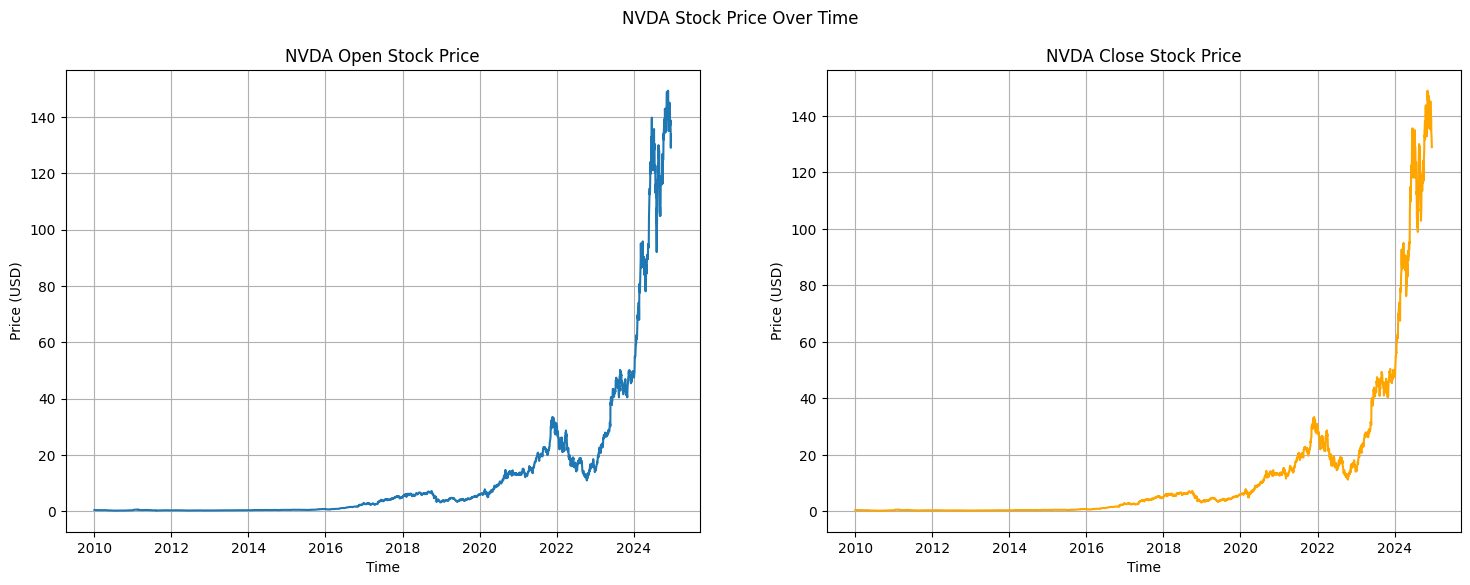

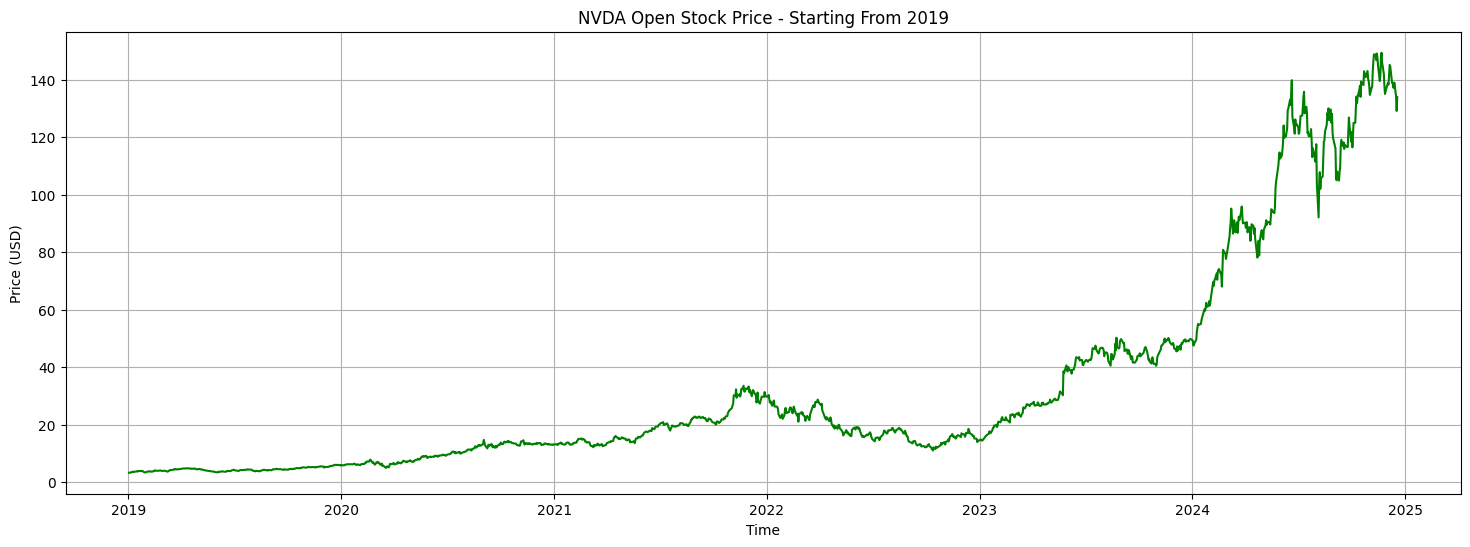

Saved filtered data for NVDA to ..\data\interim\nvda_stock_price_recent.csv

All stock data processing completed successfully.
CPU times: total: 203 ms
Wall time: 579 ms


In [5]:
%%time
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of stock tickers to process
stock_list = ['NVDA']

# Define data directories
raw_data_dir = "..\\data\\raw\\"
interim_data_dir = "..\\data\\interim\\"

# Ensure output directory exists
os.makedirs(interim_data_dir, exist_ok=True)

# Function to process stock data
def process_stock_data(ticker):
    try:
        # Prepare file names dynamically using f-strings
        input_file = f"{raw_data_dir}{ticker.lower()}_stock_price.csv"
        output_file = f"{interim_data_dir}{ticker.lower()}_stock_price_recent.csv"

        # Load data
        print(f"Processing {ticker}...")
        data = pd.read_csv(input_file)

        # Skip the first two rows
        data = data.iloc[2:]

        # Convert "Date" column to datetime format
        data["Date"] = pd.to_datetime(data["Price"])

        # Convert numerical columns to appropriate types
        data[["Open", "High", "Low", "Close", "Adj Close"]] = data[["Open", "High", "Low", "Close", "Adj Close"]].astype(float)
        # data["Volume"] = data["Volume"].astype(int) ###########################
        data["Volume"] = data["Volume"].astype(float)

        # Drop the 'Price' column
        data = data.drop(columns=["Price"])

        # Plot Open and Close prices
        plt.figure(figsize=(18, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(data["Date"], data["Open"], label="Open Price")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.title(f"{ticker} Open Stock Price")
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(data["Date"], data["Close"], label="Close Price", color="orange")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.title(f"{ticker} Close Stock Price")
        plt.grid()

        plt.suptitle(f"{ticker} Stock Price Over Time")
        plt.show()

        # Filter data for the last five years (from 2019)
        data_5years = data[data["Date"].dt.year >= 2019]

        # Plot Open stock price for the last five years
        plt.figure(figsize=(18, 6))
        plt.plot(data_5years["Date"], data_5years["Open"], label="Open Price", color="green")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.title(f"{ticker} Open Stock Price - Starting From 2019")
        plt.grid()
        plt.show()

        # Save the filtered dataset
        data_5years.to_csv(output_file, index=False)
        print(f"Saved filtered data for {ticker} to {output_file}\n")

    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")

# Loop through all tickers in stock_list
def main():
    for ticker in stock_list:
        process_stock_data(ticker)

if __name__ == "__main__":
    main()
    print("All stock data processing completed successfully.")


# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
This notebook focuses on processing the filtered dataset containing the historical prices of Google stocks over the past five years.

> **INPUT**: Filtered dataset containing Google's stock prices from the last five years, obtained from the previous phase. <br/>
> **OUTPUT**: Preprocessed and transformed data divided into training, validation, and testing subsets, stored in an interim location for the training phase.

Processing NVDA...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (13, 6)


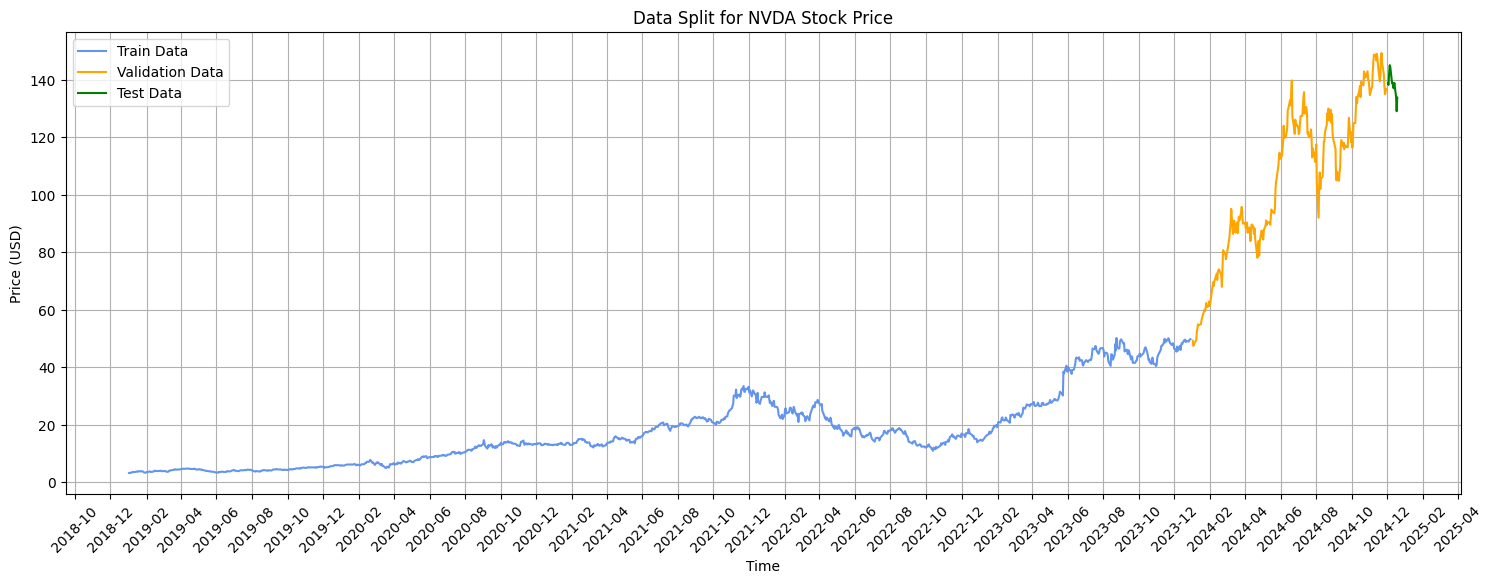

Saved processed data for NVDA.

All stock data processing and splitting completed successfully.
CPU times: total: 516 ms
Wall time: 1.06 s


In [6]:
%%time
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import joblib

# List of stock tickers to process
stock_list = ['NVDA']

# Directories for input, output, and scaler model
interim_data_dir = "..\\data\\interim\\"
processed_data_dir = "..\\data\\processed\\"
scaler_model_dir = "..\\models\\"

# Ensure directories exist
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(scaler_model_dir, exist_ok=True)

# Function to process and scale stock data
def process_and_split_stock_data(ticker):
    try:
        # Dynamic file paths
        input_file = f"{interim_data_dir}{ticker.lower()}_stock_price_recent.csv"
        scaler_file = f"{scaler_model_dir}{ticker.lower()}_stock_price_scaler.gz"
        output_train = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_train.csv"
        output_validate = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_validate.csv"
        output_test = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_test.csv"

        print(f"Processing {ticker}...")

        # Load data file
        data = pd.read_csv(input_file)

        # Convert 'Date' column to datetime format
        data["Date"] = pd.to_datetime(data["Date"])

        # Define features and target
        features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

        # Define train, validation, and test date ranges
        train_end_date = pd.to_datetime("2023-12-31")
        validate_start_date = pd.to_datetime("2024-01-01")
        validate_end_date = pd.to_datetime("2024-11-30")
        test_start_date = pd.to_datetime("2024-12-01")
        test_end_date = pd.to_datetime("2024-12-18")

        # Split dataset
        data_train = data[data["Date"] <= train_end_date][features]
        data_train_dates = data[data["Date"] <= train_end_date]["Date"]
        data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
        data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
        data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
        data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

        # Display dataset shapes
        print(f"Training Set: {data_train.shape}")
        print(f"Validation Set: {data_validate.shape}")
        print(f"Testing Set: {data_test.shape}")

        # Plot Open stock prices for each data split
        plt.figure(figsize=(18, 6))
        plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
        plt.plot(data_validate_dates, data_validate["Open"], color="orange")
        plt.plot(data_test_dates, data_test["Open"], color="green")
        plt.legend(["Train Data", "Validation Data", "Test Data"])
        plt.title(f"Data Split for {ticker} Stock Price")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

        # Initialize and fit scaler on training set
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_train_scaled = scaler.fit_transform(data_train)
        data_validate_scaled = scaler.transform(data_validate)
        data_test_scaled = scaler.transform(data_test)

        # Save scaler
        joblib.dump(scaler, scaler_file)

        # Combine scaled data with dates
        data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features)
        data_train_scaled_final["Date"] = data_train_dates.values

        data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features)
        data_validate_scaled_final["Date"] = data_validate_dates.values

        data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features)
        data_test_scaled_final["Date"] = data_test_dates.values

        # Save processed datasets
        data_train_scaled_final.to_csv(output_train, index=False)
        data_validate_scaled_final.to_csv(output_validate, index=False)
        data_test_scaled_final.to_csv(output_test, index=False)

        print(f"Saved processed data for {ticker}.\n")

    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")

# Main function to loop through all tickers
def main():
    for ticker in stock_list:
        process_and_split_stock_data(ticker)

if __name__ == "__main__":
    main()
    print("All stock data processing and splitting completed successfully.")


# LSTM Time Series - Stock Price Prediction
## Part 3 - Model Training
In this notebook, we import the scaled dataset files, prepare them in a format suitable for LSTM modeling, and proceed to train the LSTM model.

> **INPUT**: Scaled dataset files for training, validation, and testing periods, as processed in the preceding phase. <br/>
> **OUTPUT**: Trained LSTM model and analysis of its performance.

Processing NVDA...
Training LSTM model...
Epoch 1/200
19/19 [==============================] - 9s 126ms/step - loss: 0.0371 - val_loss: 1.3785
Epoch 2/200
19/19 [==============================] - 1s 58ms/step - loss: 0.0048 - val_loss: 0.7196
Epoch 3/200
19/19 [==============================] - 1s 53ms/step - loss: 0.0036 - val_loss: 0.6715
Epoch 4/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0036 - val_loss: 0.7572
Epoch 5/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0029 - val_loss: 0.7316
Epoch 6/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0029 - val_loss: 0.5739
Epoch 7/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0033 - val_loss: 0.5121
Epoch 8/200
19/19 [==============================] - 1s 49ms/step - loss: 0.0026 - val_loss: 0.5192
Epoch 9/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0024 - val_loss: 0.4790
Epoch 10/200
19/19 [==============================] - 1s 

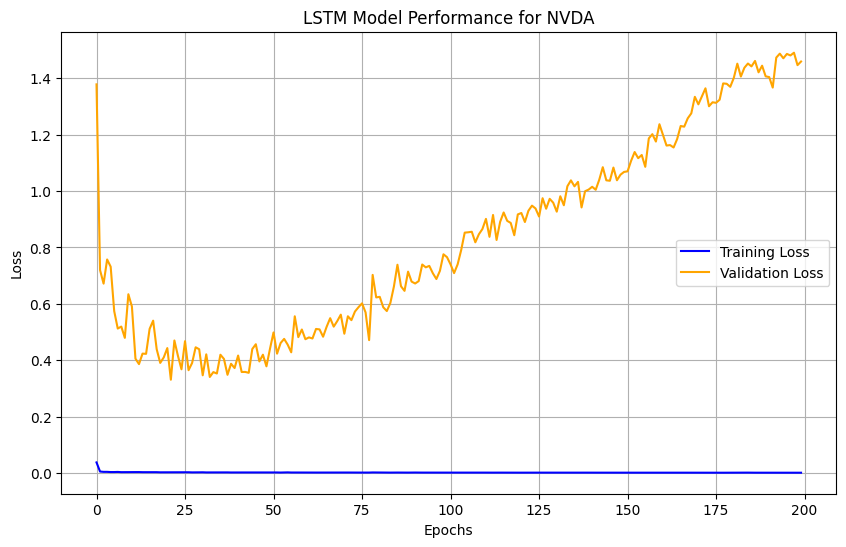

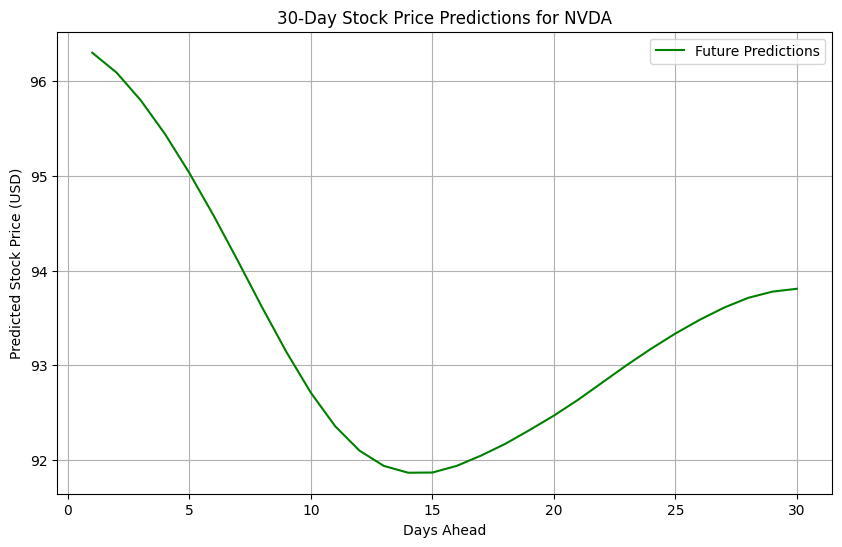

All tickers processed and charts displayed successfully.
CPU times: total: 30.2 s
Wall time: 3min 29s


In [7]:
%%time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import joblib
import tensorflow as tf
from datetime import datetime

# List of stock tickers to process
stock_list = ['NVDA']

# Directories for input, output, models, and scalers
processed_data_dir = "..//data//processed//"
models_dir = "..//models//"
output_dir = "..//data//results//"
plots_dir = "..//data//plots//"
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Function to construct LSTM input/output data
def construct_lstm_data(data, sequence_size, target_attr_idx):
    data_X, data_y = [], []
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i, :])
        data_y.append(data[i, target_attr_idx])
    return np.array(data_X), np.array(data_y)

# Function to predict future prices
def predict_future(model, last_sequence, days_to_predict, scaler=None):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch, verbose=0)[0, 0]
        future_predictions.append(next_prediction)

        # Slide the sequence forward
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1, 0] = next_prediction

    # Inverse transform predictions if scaler is provided
    # if scaler:
    #     future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    if scaler:
    # Pad future_predictions with dummy columns to match the scaler's expected shape
        padded_predictions = np.concatenate(
            (np.array(future_predictions).reshape(-1, 1), np.ones((len(future_predictions), 5))), axis=1
        )
        future_predictions = scaler.inverse_transform(padded_predictions)[:, 0]  # Take only the first column
    return future_predictions

    
def main():
    # Initialize lists to store plots
    performance_plots = []
    prediction_plots = []

    for ticker in stock_list:
        try:
            print(f"Processing {ticker}...")

            # File paths
            train_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_train.csv"
            validate_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_validate.csv"
            test_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_test.csv"
            scaler_file = f"{models_dir}{ticker.lower()}_stock_price_scaler.gz"
            model_file = f"{models_dir}{ticker.lower()}_stock_price_lstm.model.keras"

            # Load processed data
            data_train_df = pd.read_csv(train_file)
            data_validate_df = pd.read_csv(validate_file)
            data_test_df = pd.read_csv(test_file)

            # Convert 'Date' column to datetime
            data_train_df["Date"] = pd.to_datetime(data_train_df["Date"])
            data_validate_df["Date"] = pd.to_datetime(data_validate_df["Date"])
            data_test_df["Date"] = pd.to_datetime(data_test_df["Date"])

            # Extract dates and features
            features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
            data_train = data_train_df[features].values
            data_validate = data_validate_df[features].values
            data_test = data_test_df[features].values

            # Combine all datasets
            data_all = np.concatenate([data_train, data_validate, data_test], axis=0)
            sequence_size = 60  # Define sequence size

            # Construct LSTM input/output
            X_train, y_train = construct_lstm_data(data_train, sequence_size, 0)
            train_size = len(data_train)
            validate_size = len(data_validate)

            X_validate, y_validate = construct_lstm_data(
                data_all[train_size-sequence_size:train_size+validate_size], sequence_size, 0
            )
            X_test, y_test = construct_lstm_data(data_all[-(len(data_test) + sequence_size):], sequence_size, 0)

            # Initialize the LSTM model
            model = Sequential()
            model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100))
            model.add(Dropout(0.2))
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Checkpoint to save the best model
            checkpoint = ModelCheckpoint(model_file, monitor="val_loss", save_best_only=True, mode="min", verbose=0)

            # Train the model
            print("Training LSTM model...")
            with tf.device('/GPU:0'):
                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=200,
                    batch_size=64,
                    callbacks=[checkpoint],
                    verbose=1
                )

            # Load the best model
            best_model = load_model(model_file)

            # Make future predictions
            scaler = joblib.load(scaler_file)
            future_predictions = predict_future(best_model, X_test[-1], days_to_predict=30, scaler=scaler)

            # Get the current date in DD-MM-YYYY format
            current_date = datetime.now().strftime("%d-%m-%Y")
            
            # Save performance plot
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(history.history["loss"], label="Training Loss", color="blue")
            ax.plot(history.history["val_loss"], label="Validation Loss", color="orange")
            ax.set_title(f"LSTM Model Performance for {ticker}")
            ax.set_xlabel("Epochs")
            ax.set_ylabel("Loss")
            ax.legend()
            ax.grid()
            performance_plot_path = os.path.join(
                plots_dir, f"{current_date}_{ticker.upper()}_performance_plot.png"
            )
            fig.savefig(performance_plot_path, format="png", dpi=300)  # Save as .png
            performance_plots.append(fig)  # Store performance plot for rendering later
            
            # Save prediction plot
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(range(1, 31), future_predictions, label="Future Predictions", color="green")
            ax.set_title(f"30-Day Stock Price Predictions for {ticker}")
            ax.set_xlabel("Days Ahead")
            ax.set_ylabel("Predicted Stock Price (USD)")
            ax.legend()
            ax.grid()
            prediction_plot_path = os.path.join(
                plots_dir, f"{current_date}_{ticker.upper()}_prediction_plot.png"
            )
            fig.savefig(prediction_plot_path, format="png", dpi=300)
            prediction_plots.append(fig)  # Store prediction plot for rendering later

            print(f"Completed processing for {ticker}.\n")

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    # Render all stored plots at the end
    print("\nRendering all plots...")
    for fig in performance_plots + prediction_plots:
        plt.show(fig)

if __name__ == "__main__":
    main()
    print("All tickers processed and charts displayed successfully.")


Processing AAPL...
Training LSTM model...
Epoch 1/200
19/19 [==============================] - 14s 128ms/step - loss: 0.0395 - val_loss: 0.0113
Epoch 2/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0068 - val_loss: 0.0156
Epoch 3/200
19/19 [==============================] - 1s 53ms/step - loss: 0.0041 - val_loss: 0.0099
Epoch 4/200
19/19 [==============================] - 1s 51ms/step - loss: 0.0044 - val_loss: 0.0082
Epoch 5/200
19/19 [==============================] - 1s 52ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 6/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0040 - val_loss: 0.0128
Epoch 7/200
19/19 [==============================] - 1s 49ms/step - loss: 0.0040 - val_loss: 0.0074
Epoch 8/200
19/19 [==============================] - 1s 49ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 9/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 10/200
19/19 [==============================] - 1s

<timed exec>:142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Completed processing for WMT.

Processing V...
Training LSTM model...
Epoch 1/200
19/19 [==============================] - 6s 112ms/step - loss: 0.0526 - val_loss: 0.1155
Epoch 2/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0089 - val_loss: 0.0408
Epoch 3/200
19/19 [==============================] - 1s 48ms/step - loss: 0.0069 - val_loss: 0.0162
Epoch 4/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0063 - val_loss: 0.0120
Epoch 5/200
19/19 [==============================] - 1s 44ms/step - loss: 0.0059 - val_loss: 0.0170
Epoch 6/200
19/19 [==============================] - 1s 45ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 7/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 8/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0058 - val_loss: 0.0088
Epoch 9/200
19/19 [==============================] - 1s 45ms/step - loss: 0.0055 - val_loss: 0.0063
Epoch 10/200
19/19 [=========

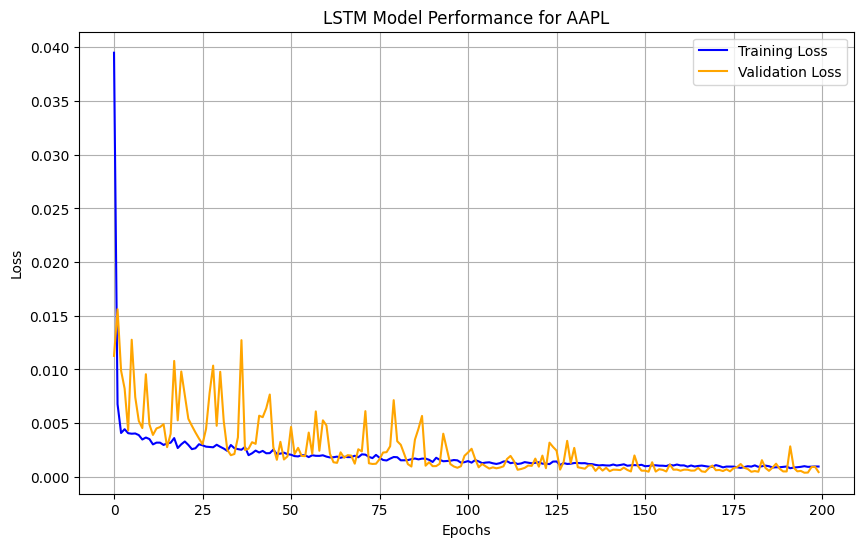

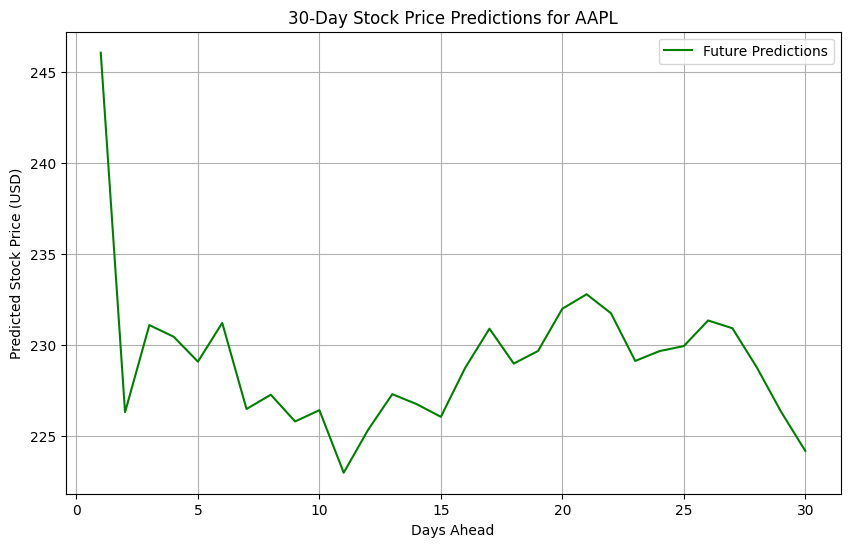

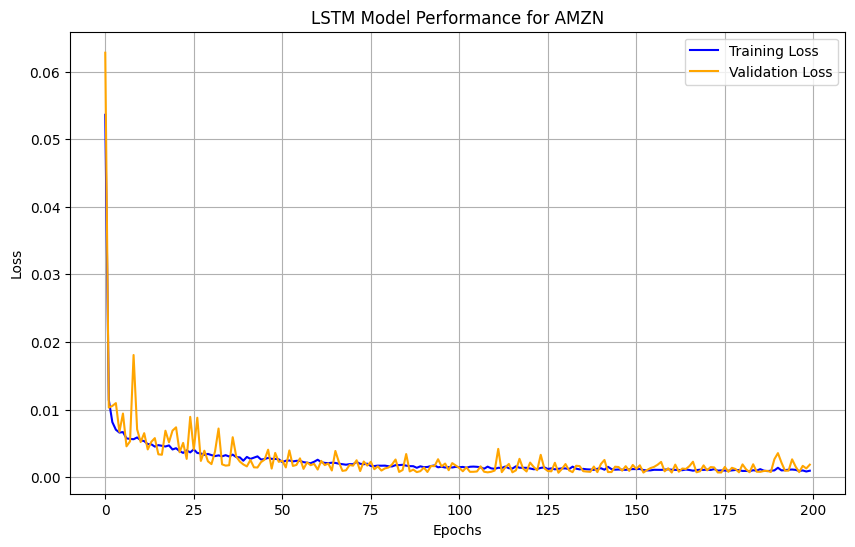

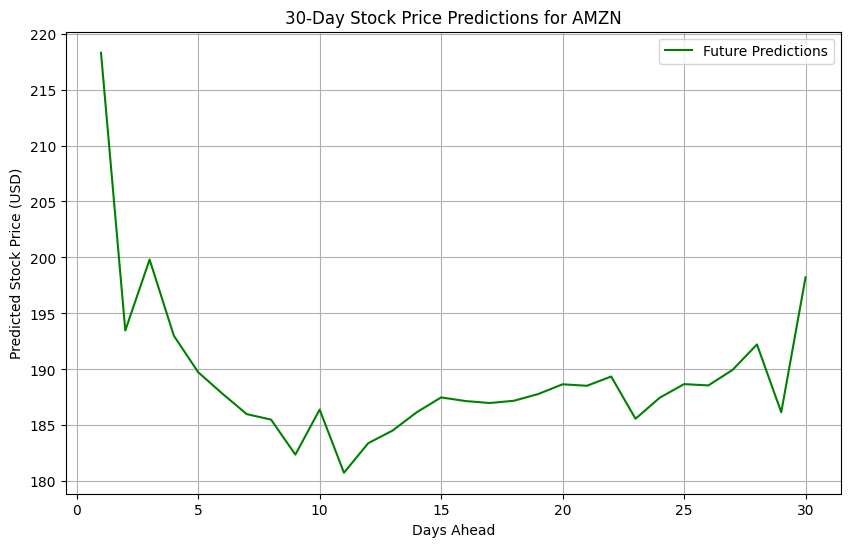

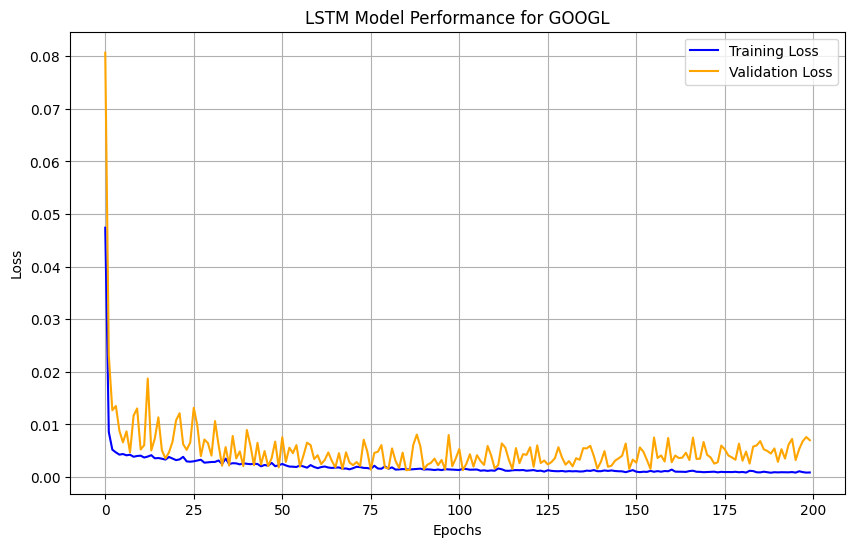

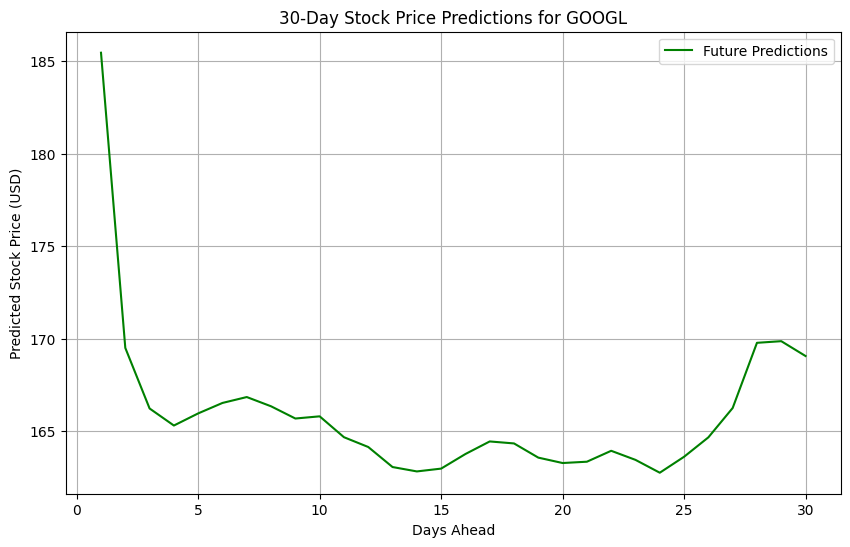

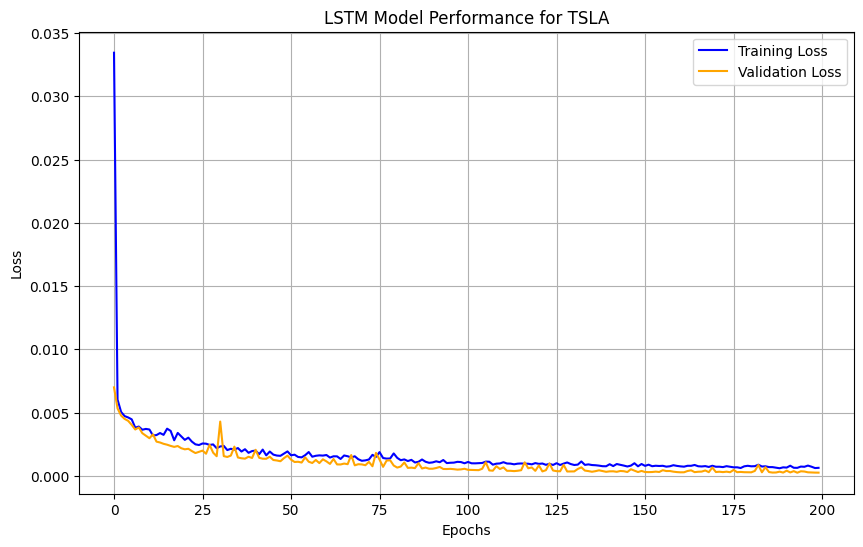

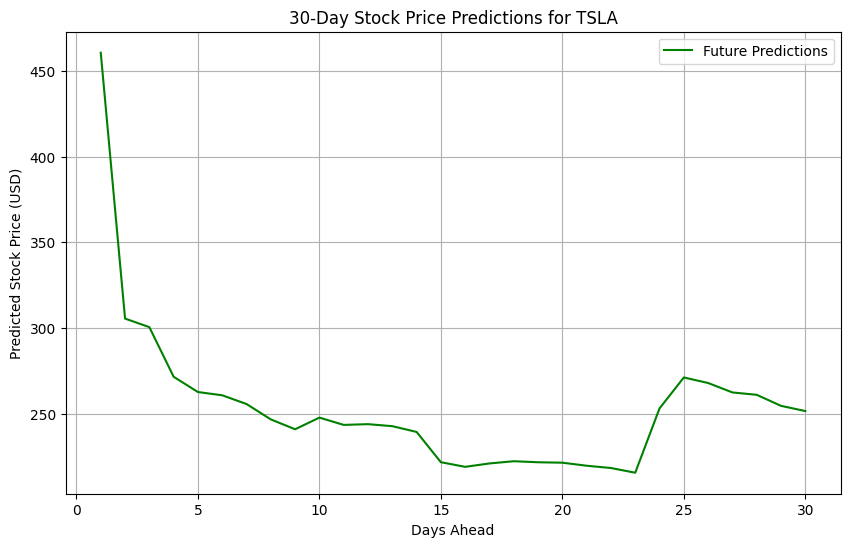

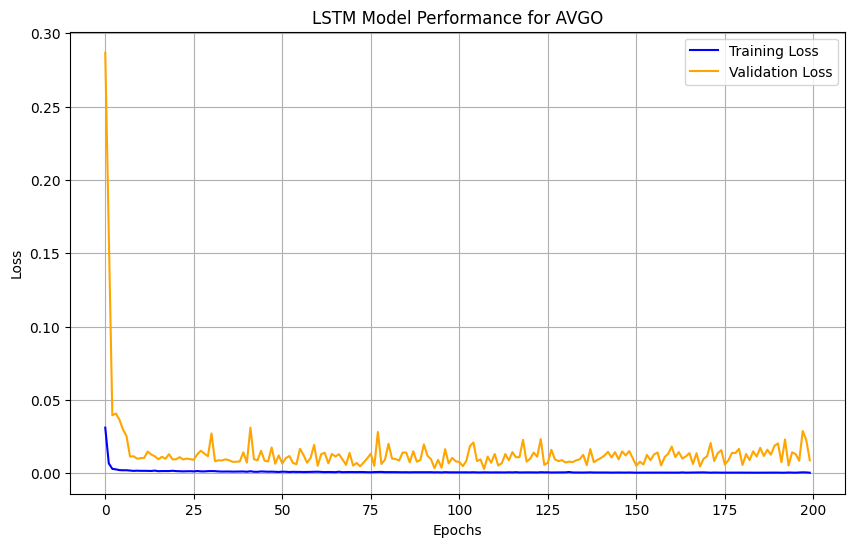

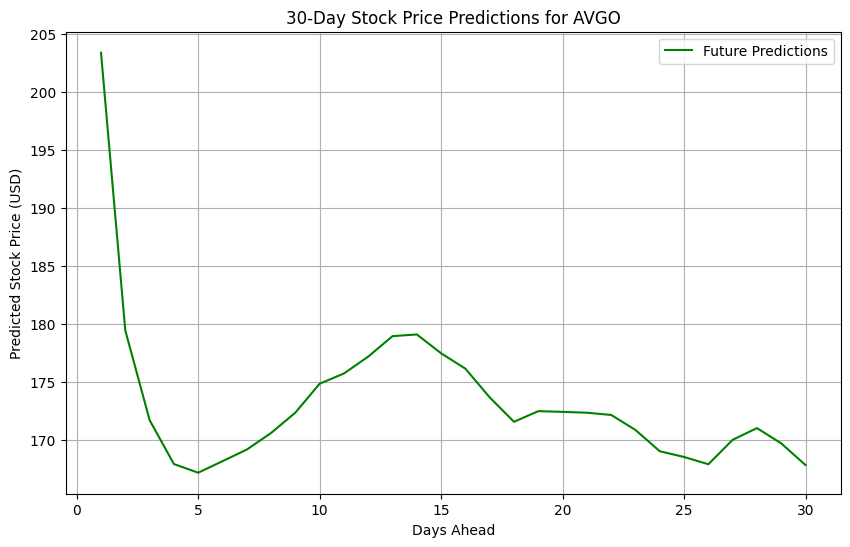

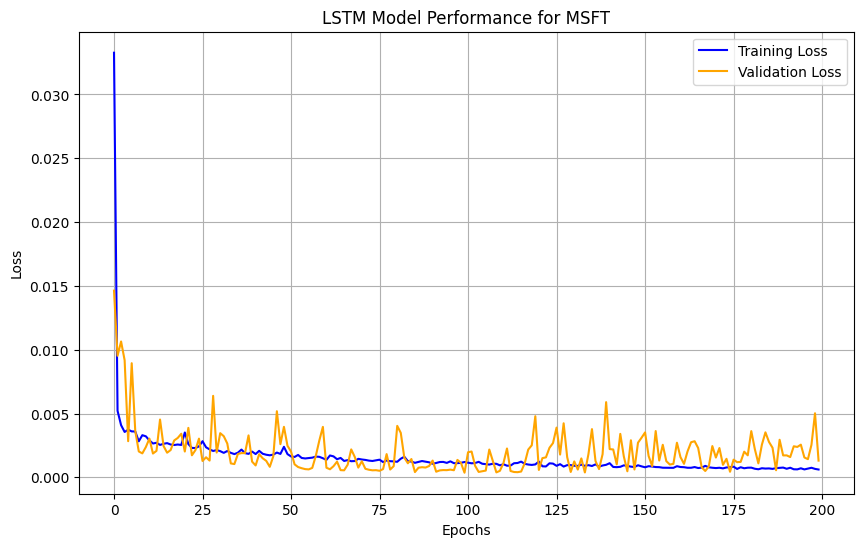

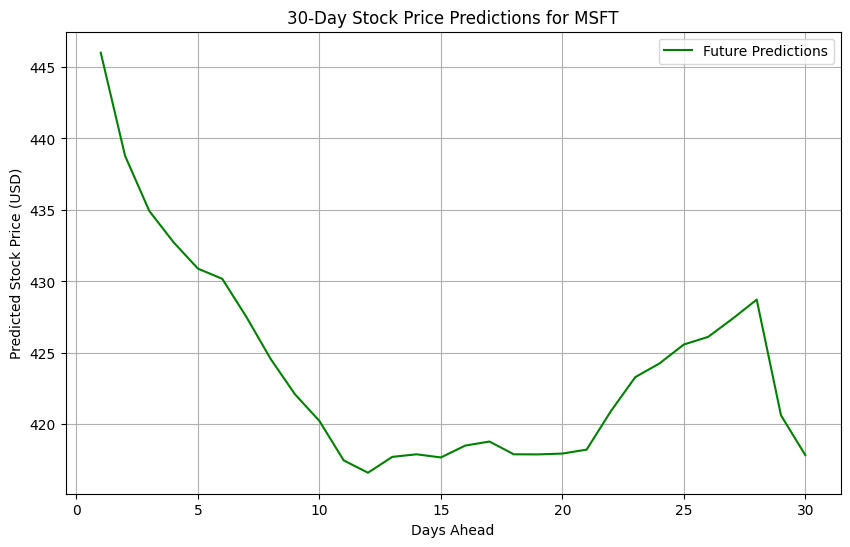

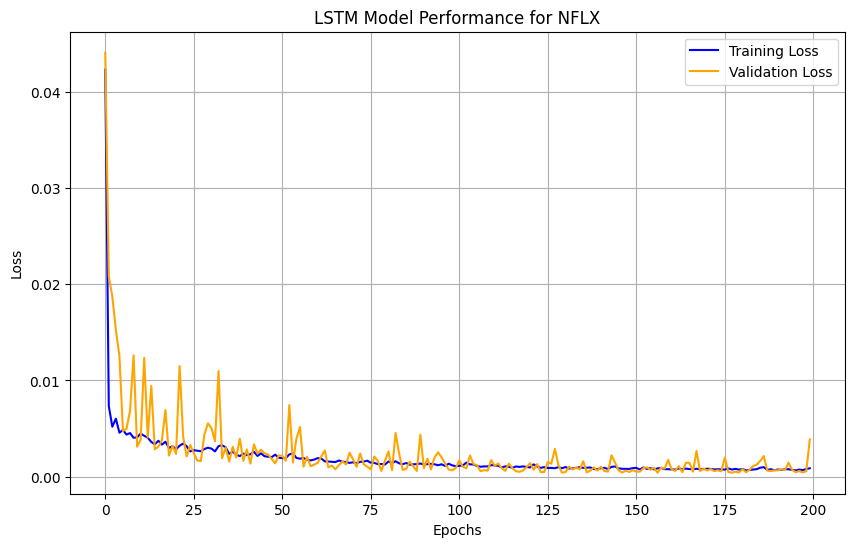

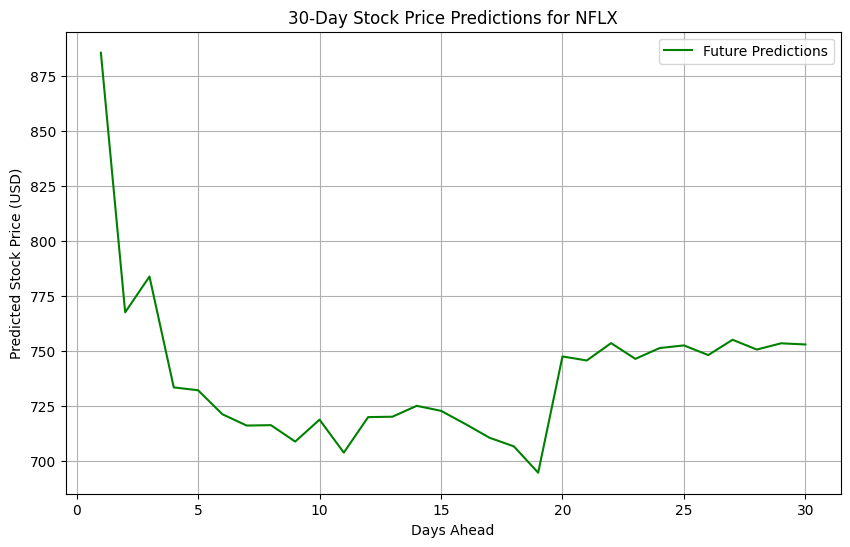

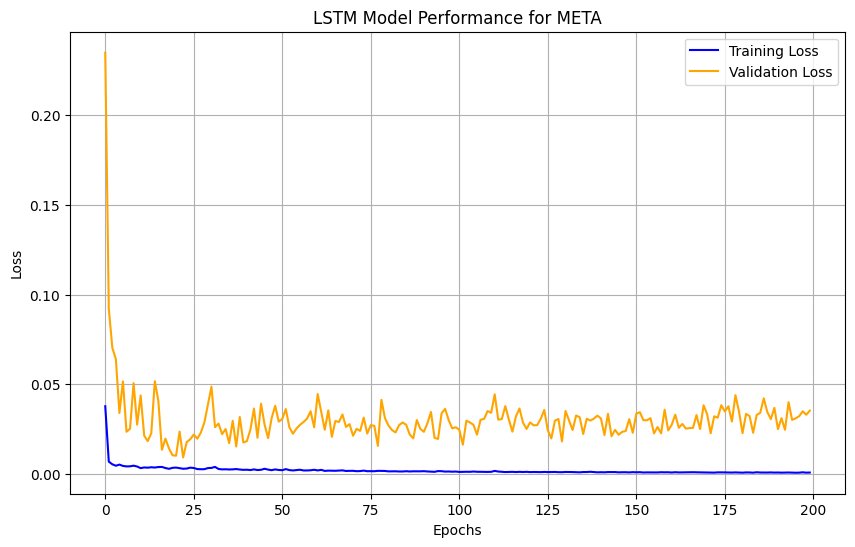

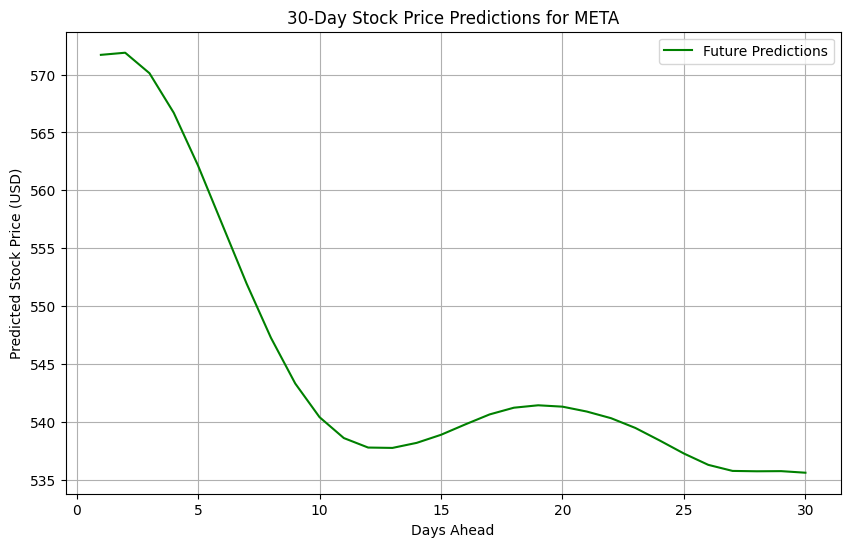

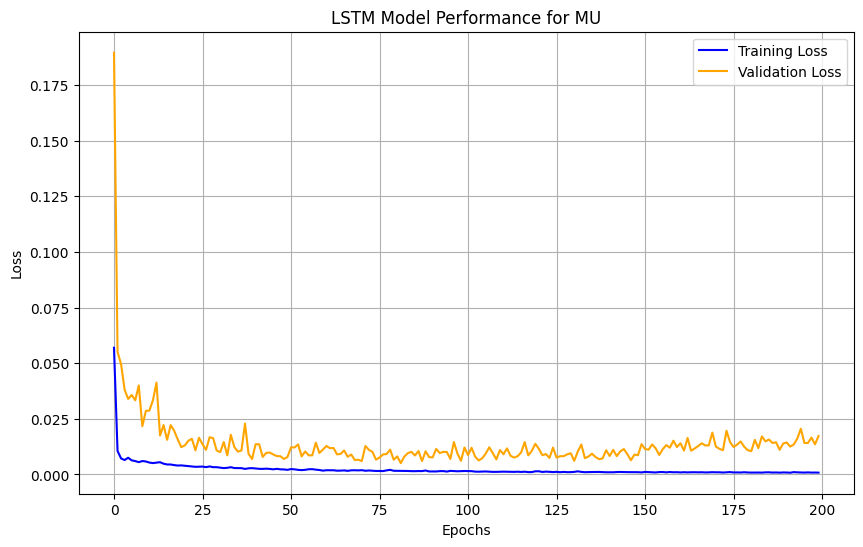

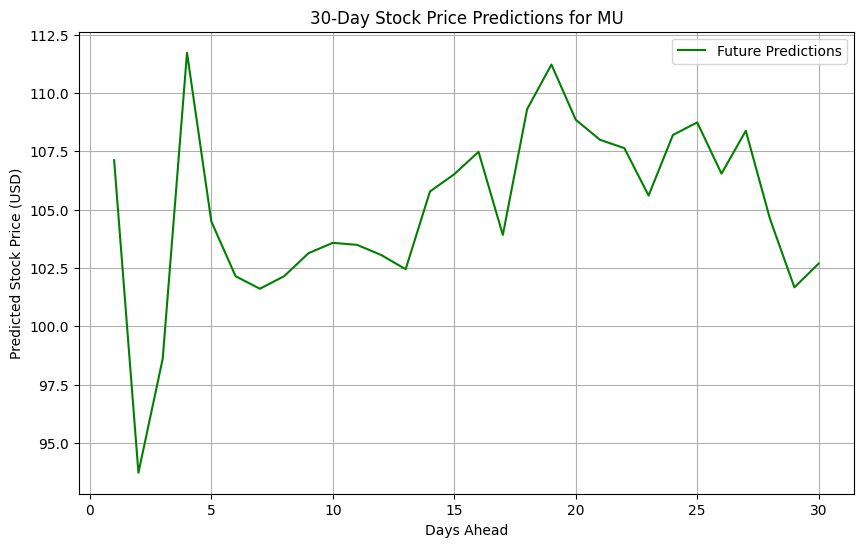

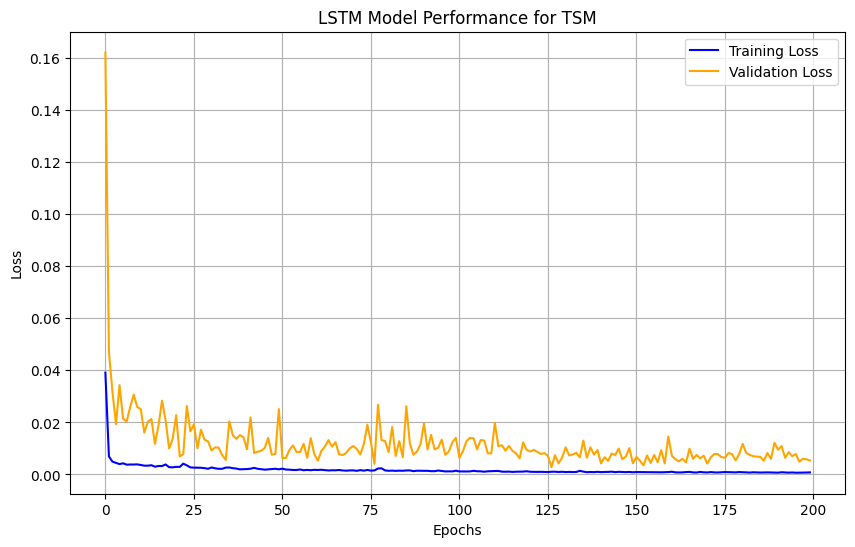

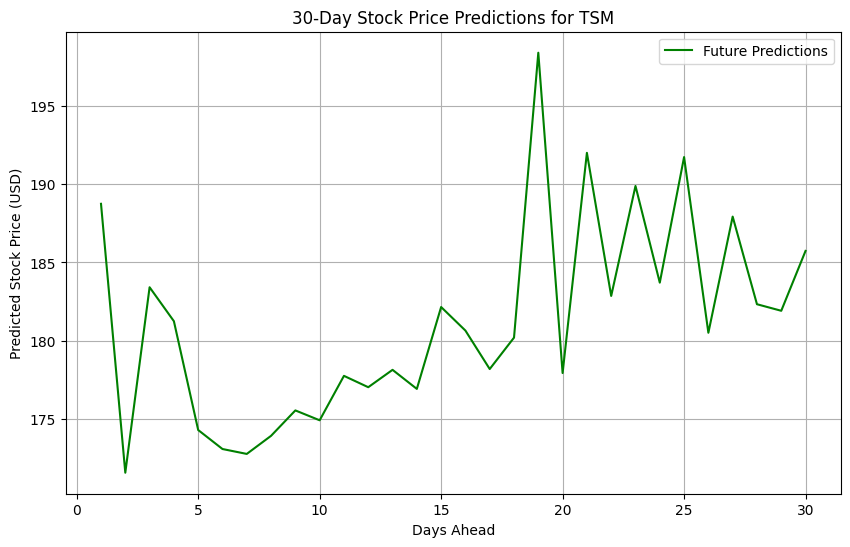

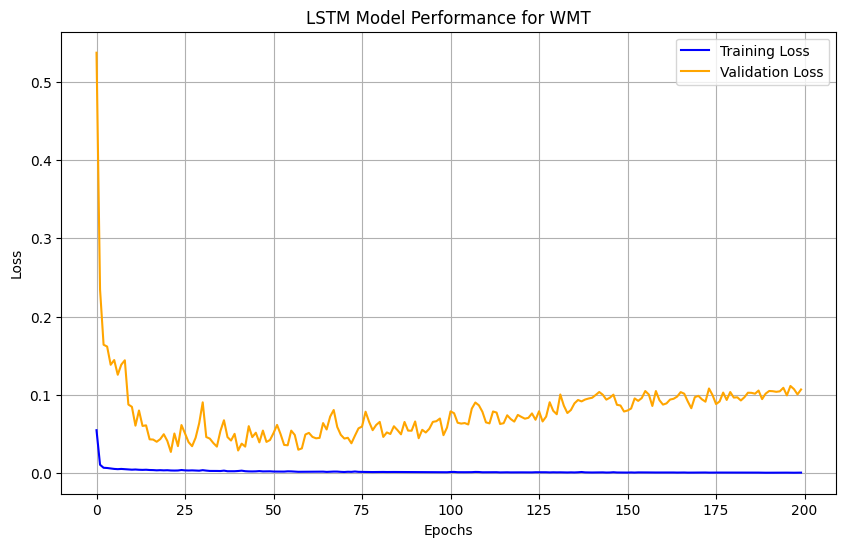

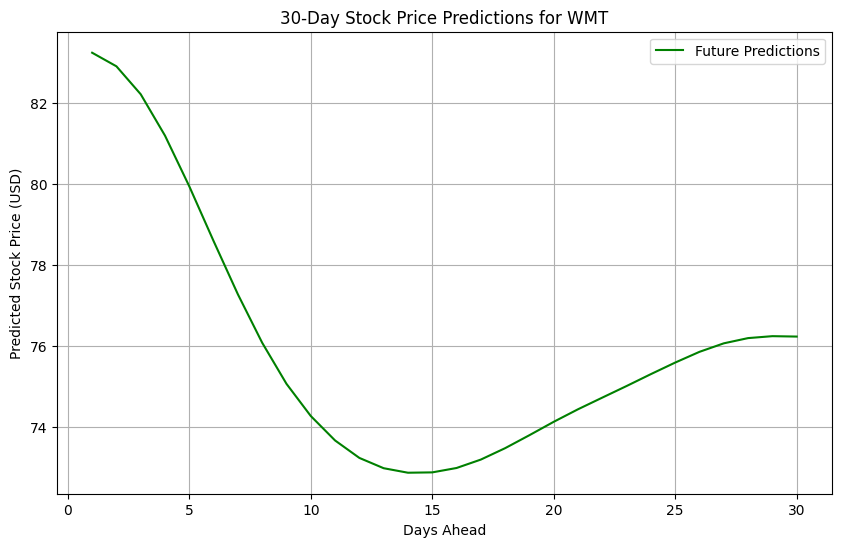

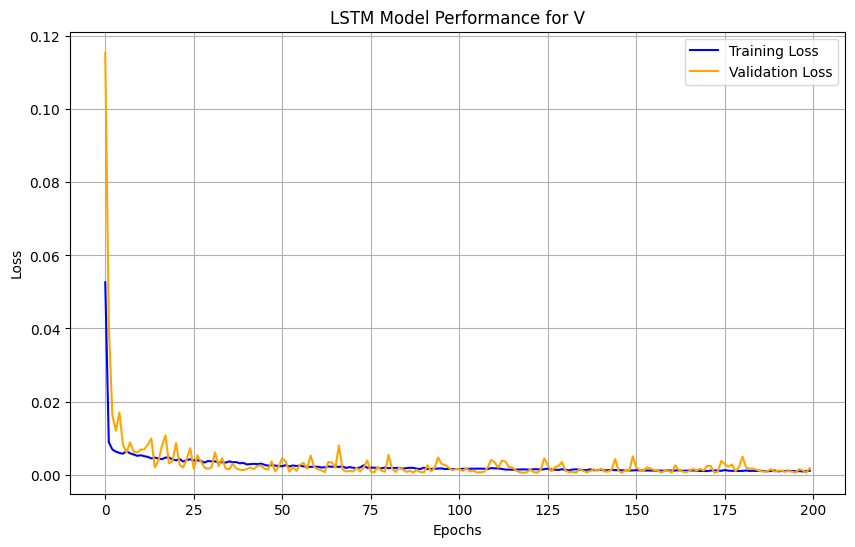

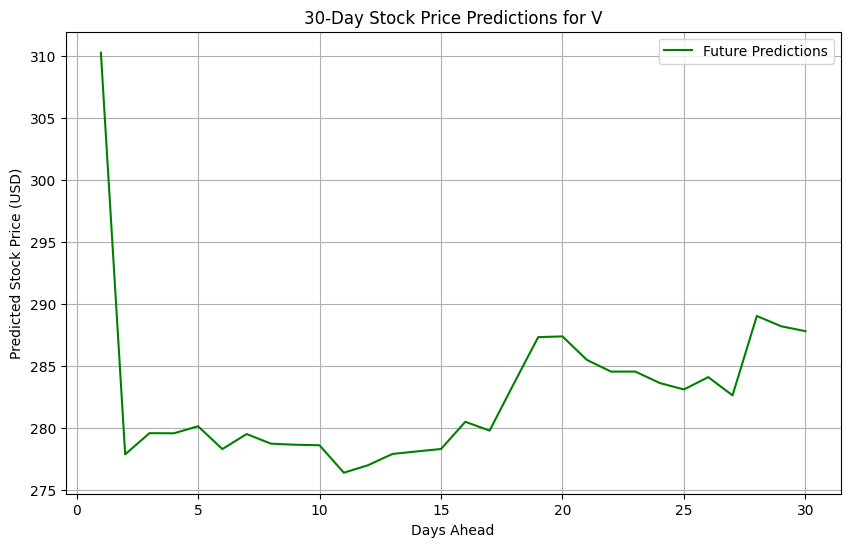

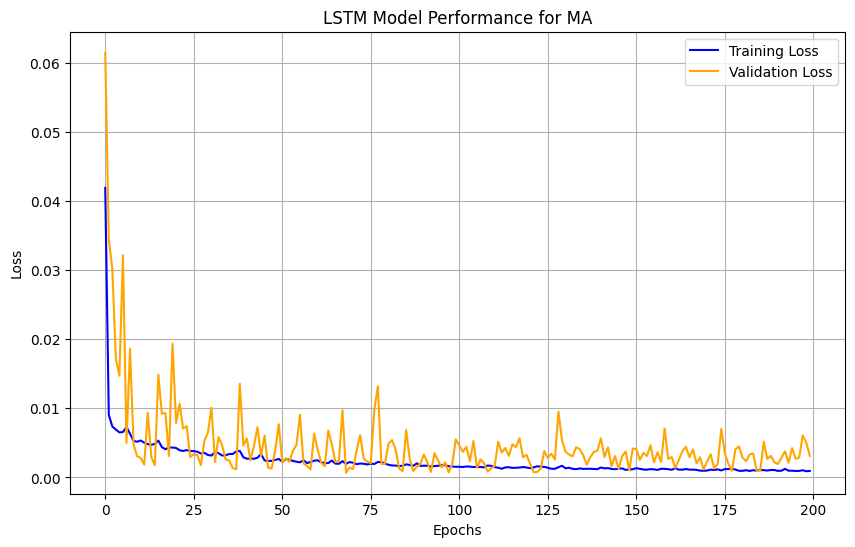

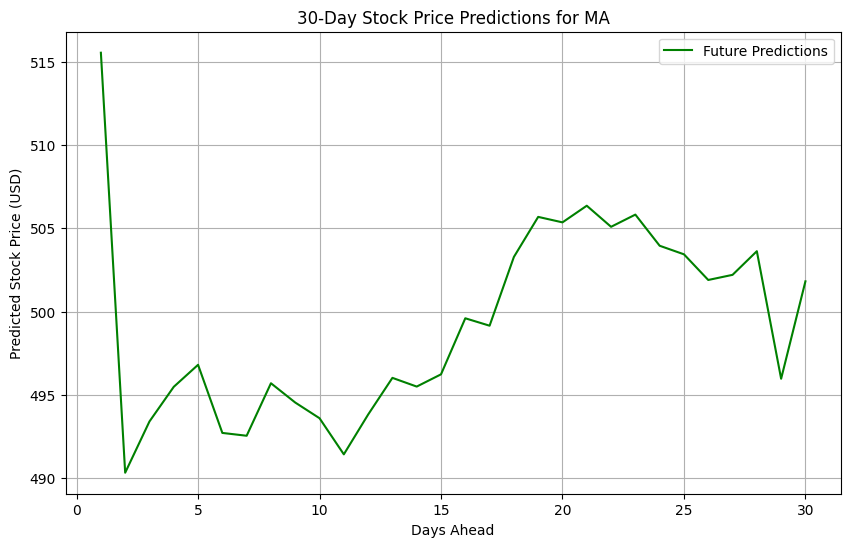

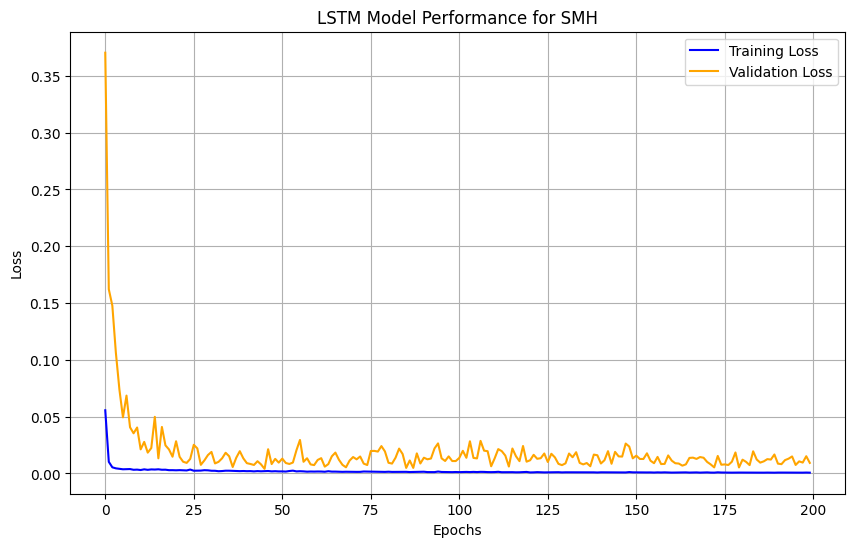

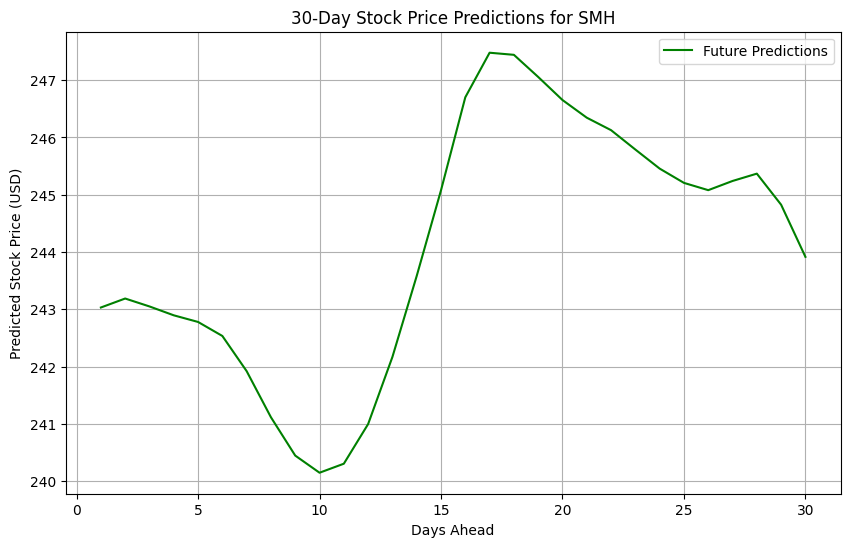

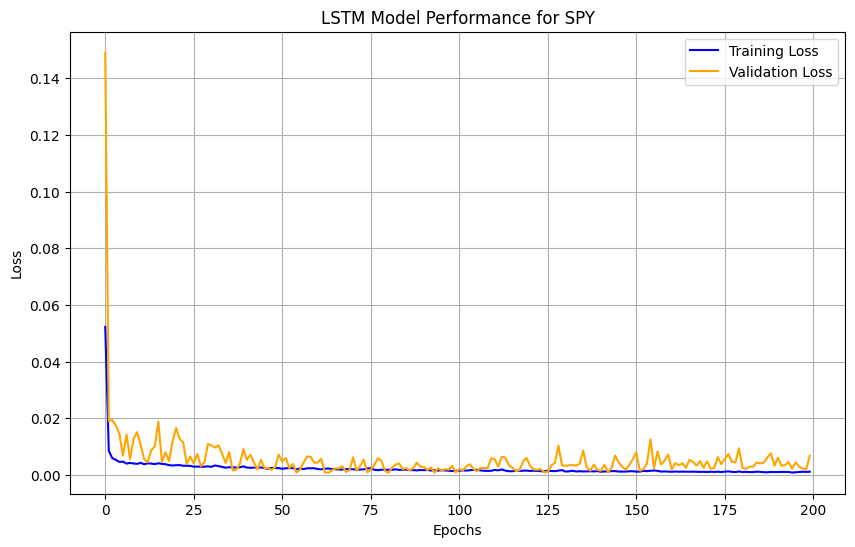

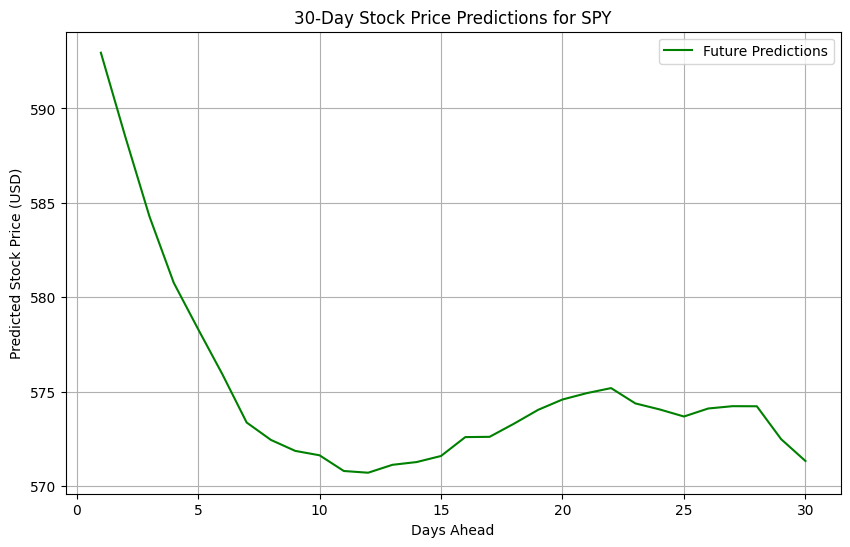

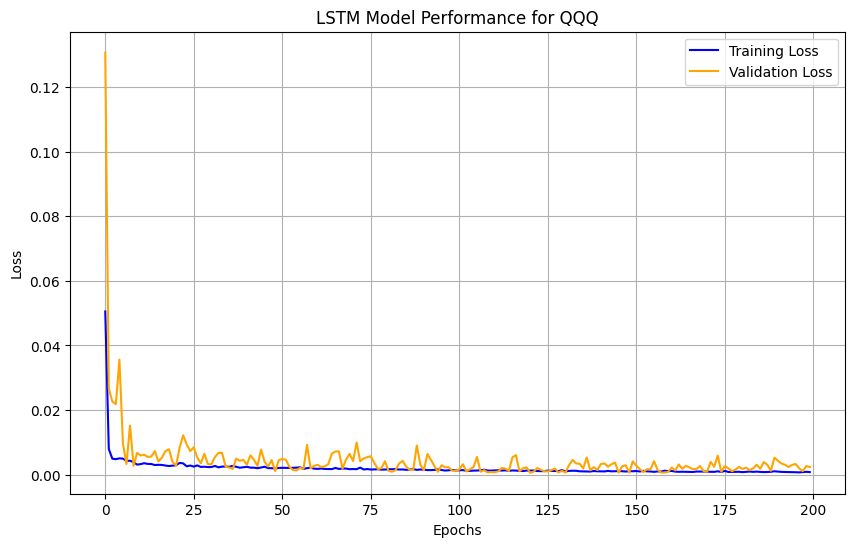

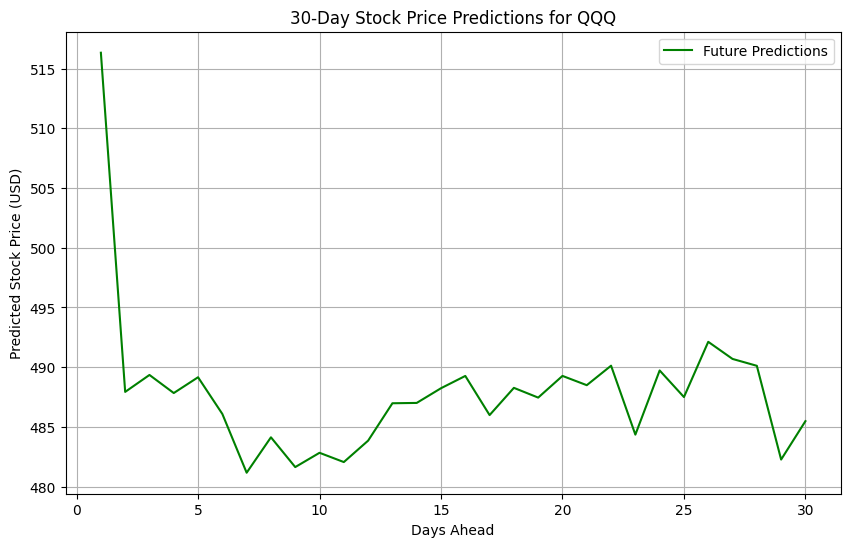

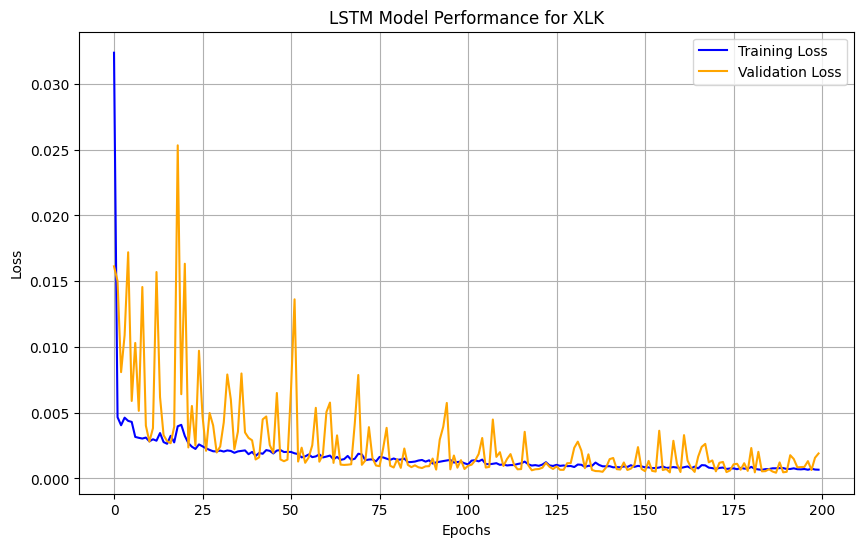

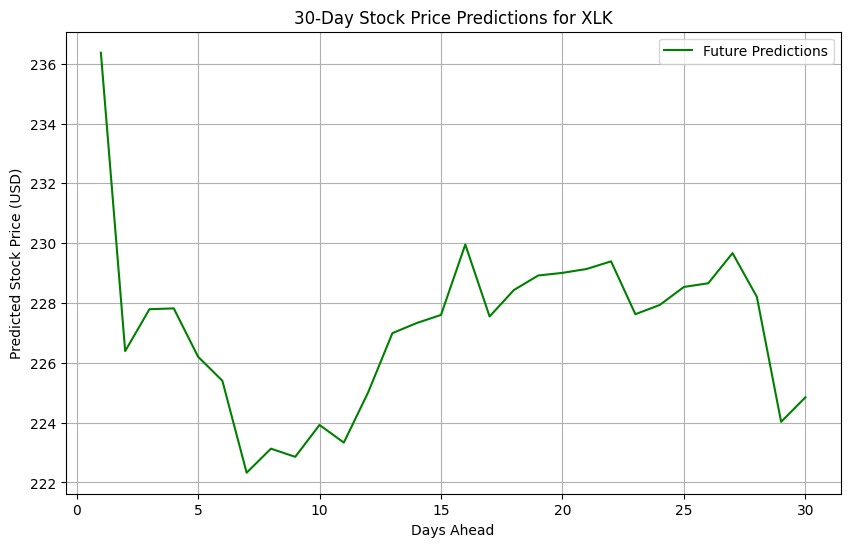

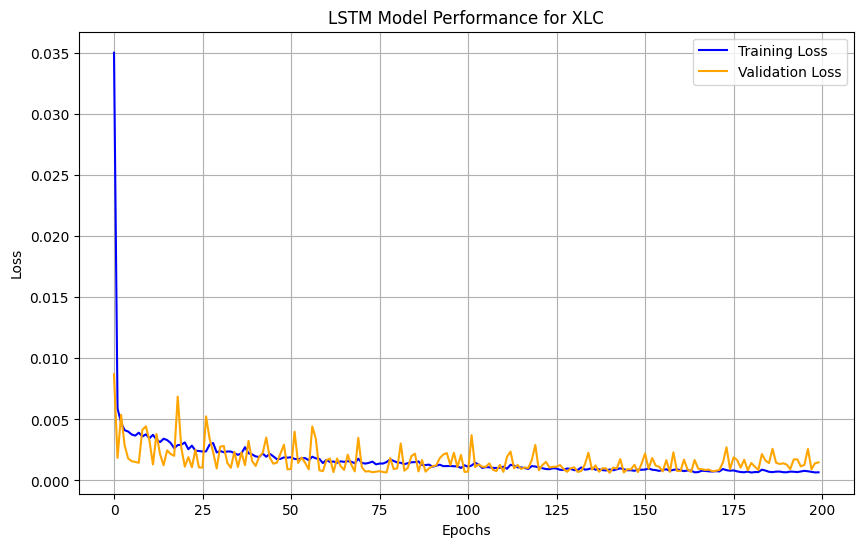

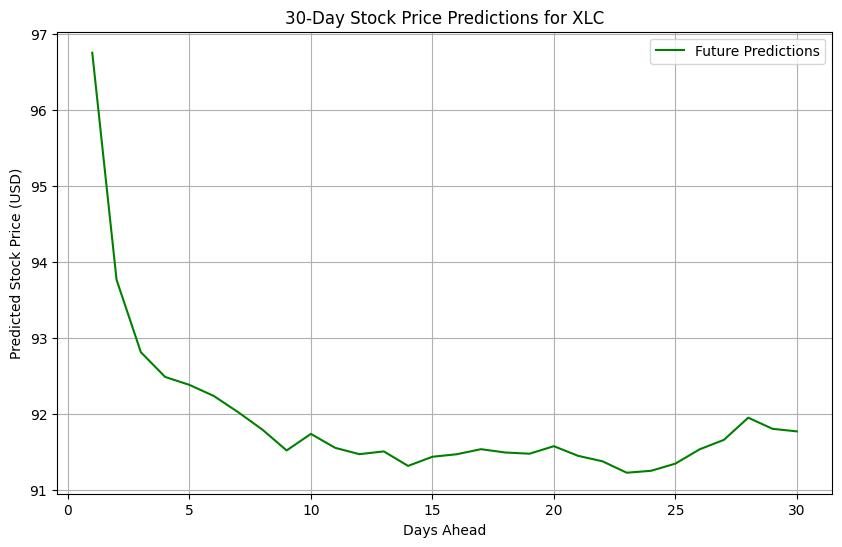

All tickers processed and charts displayed successfully.
CPU times: total: 11min 31s
Wall time: 58min 41s


In [28]:
%%time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import joblib
import tensorflow as tf

# List of stock tickers to process
# stock_list = ['AAPL', 'TSLA']

# Directories for input, output, models, and scalers
processed_data_dir = "..//data//processed//"
models_dir = "..//models//"
output_dir = "..//data//results//"
os.makedirs(models_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Function to construct LSTM input/output data
def construct_lstm_data(data, sequence_size, target_attr_idx):
    data_X, data_y = [], []
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i, :])
        data_y.append(data[i, target_attr_idx])
    return np.array(data_X), np.array(data_y)

# Function to predict future prices
def predict_future(model, last_sequence, days_to_predict, scaler=None):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch, verbose=0)[0, 0]
        future_predictions.append(next_prediction)

        # Slide the sequence forward
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1, 0] = next_prediction

    # Inverse transform predictions if scaler is provided
    # if scaler:
    #     future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    if scaler:
    # Pad future_predictions with dummy columns to match the scaler's expected shape
        padded_predictions = np.concatenate(
            (np.array(future_predictions).reshape(-1, 1), np.ones((len(future_predictions), 5))), axis=1
        )
        future_predictions = scaler.inverse_transform(padded_predictions)[:, 0]  # Take only the first column
    return future_predictions

    
def main():
    # Initialize lists to store plots
    performance_plots = []
    prediction_plots = []

    for ticker in stock_list:
        try:
            print(f"Processing {ticker}...")

            # File paths
            train_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_train.csv"
            validate_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_validate.csv"
            test_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_test.csv"
            scaler_file = f"{models_dir}{ticker.lower()}_stock_price_scaler.gz"
            model_file = f"{models_dir}{ticker.lower()}_stock_price_lstm.model.keras"

            # Load processed data
            data_train_df = pd.read_csv(train_file)
            data_validate_df = pd.read_csv(validate_file)
            data_test_df = pd.read_csv(test_file)

            # Convert 'Date' column to datetime
            data_train_df["Date"] = pd.to_datetime(data_train_df["Date"])
            data_validate_df["Date"] = pd.to_datetime(data_validate_df["Date"])
            data_test_df["Date"] = pd.to_datetime(data_test_df["Date"])

            # Extract dates and features
            features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
            data_train = data_train_df[features].values
            data_validate = data_validate_df[features].values
            data_test = data_test_df[features].values

            # Combine all datasets
            data_all = np.concatenate([data_train, data_validate, data_test], axis=0)
            sequence_size = 60  # Define sequence size

            # Construct LSTM input/output
            X_train, y_train = construct_lstm_data(data_train, sequence_size, 0)
            train_size = len(data_train)
            validate_size = len(data_validate)

            X_validate, y_validate = construct_lstm_data(
                data_all[train_size-sequence_size:train_size+validate_size], sequence_size, 0
            )
            X_test, y_test = construct_lstm_data(data_all[-(len(data_test) + sequence_size):], sequence_size, 0)

            # Initialize the LSTM model
            model = Sequential()
            model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100))
            model.add(Dropout(0.2))
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Checkpoint to save the best model
            checkpoint = ModelCheckpoint(model_file, monitor="val_loss", save_best_only=True, mode="min", verbose=0)

            # Train the model
            print("Training LSTM model...")
            with tf.device('/GPU:0'):
                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=200,
                    batch_size=64,
                    callbacks=[checkpoint],
                    verbose=1
                )

            # Load the best model
            best_model = load_model(model_file)

            # Make future predictions
            scaler = joblib.load(scaler_file)
            future_predictions = predict_future(best_model, X_test[-1], days_to_predict=30, scaler=scaler)

            # Save performance plot
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(history.history["loss"], label="Training Loss", color="blue")
            ax.plot(history.history["val_loss"], label="Validation Loss", color="orange")
            ax.set_title(f"LSTM Model Performance for {ticker}")
            ax.set_xlabel("Epochs")
            ax.set_ylabel("Loss")
            ax.legend()
            ax.grid()
            performance_plots.append(fig)  # Store performance plot for rendering later

            # Save prediction plot
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(range(1, 31), future_predictions, label="Future Predictions", color="green")
            ax.set_title(f"30-Day Stock Price Predictions for {ticker}")
            ax.set_xlabel("Days Ahead")
            ax.set_ylabel("Predicted Stock Price (USD)")
            ax.legend()
            ax.grid()
            prediction_plots.append(fig)  # Store prediction plot for rendering later

            print(f"Completed processing for {ticker}.\n")

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    # Render all stored plots at the end
    print("\nRendering all plots...")
    for fig in performance_plots + prediction_plots:
        plt.show(fig)

if __name__ == "__main__":
    main()
    print("All tickers processed and charts displayed successfully.")


In [30]:
len(stock_list)

19

In [36]:
stock_list

['AAPL',
 'AMZN',
 'GOOGL',
 'NVDA',
 'TSLA',
 'AVGO',
 'MSFT',
 'NFLX',
 'META',
 'MU',
 'TSM',
 'WMT',
 'V',
 'MA',
 'SMH',
 'SPY',
 'QQQ',
 'XLK',
 'XLC']

In [ ]:
NVDA

In [ ]:
len(stock_list)

<timed exec>:142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.